# MANTENIMIENTO PREDICTIVO EN MOTORES DE AVIÓN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



In [3]:
df= pd.read_csv('../data/processed/datos_normalizados.csv', delimiter=',')

df

id  cycle  setting1  setting2  setting3   s1        s2        s3  \
0        1      1  0.459770  0.166667       0.0  0.0  0.183735  0.406802   
1        1      2  0.609195  0.250000       0.0  0.0  0.283133  0.453019   
2        1      3  0.252874  0.750000       0.0  0.0  0.343373  0.369523   
3        1      4  0.540230  0.500000       0.0  0.0  0.343373  0.256159   
4        1      5  0.390805  0.333333       0.0  0.0  0.349398  0.257467   
...    ...    ...       ...       ...       ...  ...       ...       ...   
20626  100    196  0.477011  0.250000       0.0  0.0  0.686747  0.587312   
20627  100    197  0.408046  0.083333       0.0  0.0  0.701807  0.729453   
20628  100    198  0.522989  0.500000       0.0  0.0  0.665663  0.684979   
20629  100    199  0.436782  0.750000       0.0  0.0  0.608434  0.746021   
20630  100    200  0.316092  0.083333       0.0  0.0  0.795181  0.639634   

             s4   s5  ...       s17  s18  s19       s20       s21  \
0      0.309757  0.0  ...  0.333333  0.0  0.0  0.713178  0.724662   
1      0.352633  0.0  ...  0.333333  0.0  0.0  0.666667  0.731014   
2      0.370527  0.0  ...  0.166667  0.0  0.0  0.627907  0.621375   
3      0.331195  0.0  ...  0.333333  0.0  0.0  0.573643  0.662386   
4      0.404625  0.0  ...  0.416667  0.0  0.0  0.589147  0.704502   
...         ...  ...  ...       ...  ...  ...       ...       ...   
20626  0.782917  0.0  ...  0.750000  0.0  0.0  0.271318  0.109500   
20627  0.866475  0.0  ...  0.583333  0.0  0.0  0.124031  0.366197   
20628  0.775321  0.0  ...  0.833333  0.0  0.0  0.232558  0.053991   
20629  0.747468  0.0  ...  0.583333  0.0  0.0  0.116279  0.234466   
20630  0.842167  0.0  ...  0.666667  0.0  0.0  0.178295  0.218172   

       failure_cycle  is_failure_cycle    RUL  label1  label2  
0                112                 0  191.0       0       0  
1                112                 0  190.0       0       0  
2                112                 0  189.0       0       0  
3                112                 0  188.0       0       0  
4                112                 0  187.0       0       0  
...              ...               ...    ...     ...     ...  
20626             20                 0    4.0       1       2  
20627             20                 0    3.0       1       2  
20628             20                 0    2.0       1       2  
20629             20                 0    1.0       1       2  
20630             20                 0    0.0       1       2  

[20631 rows x 31 columns]

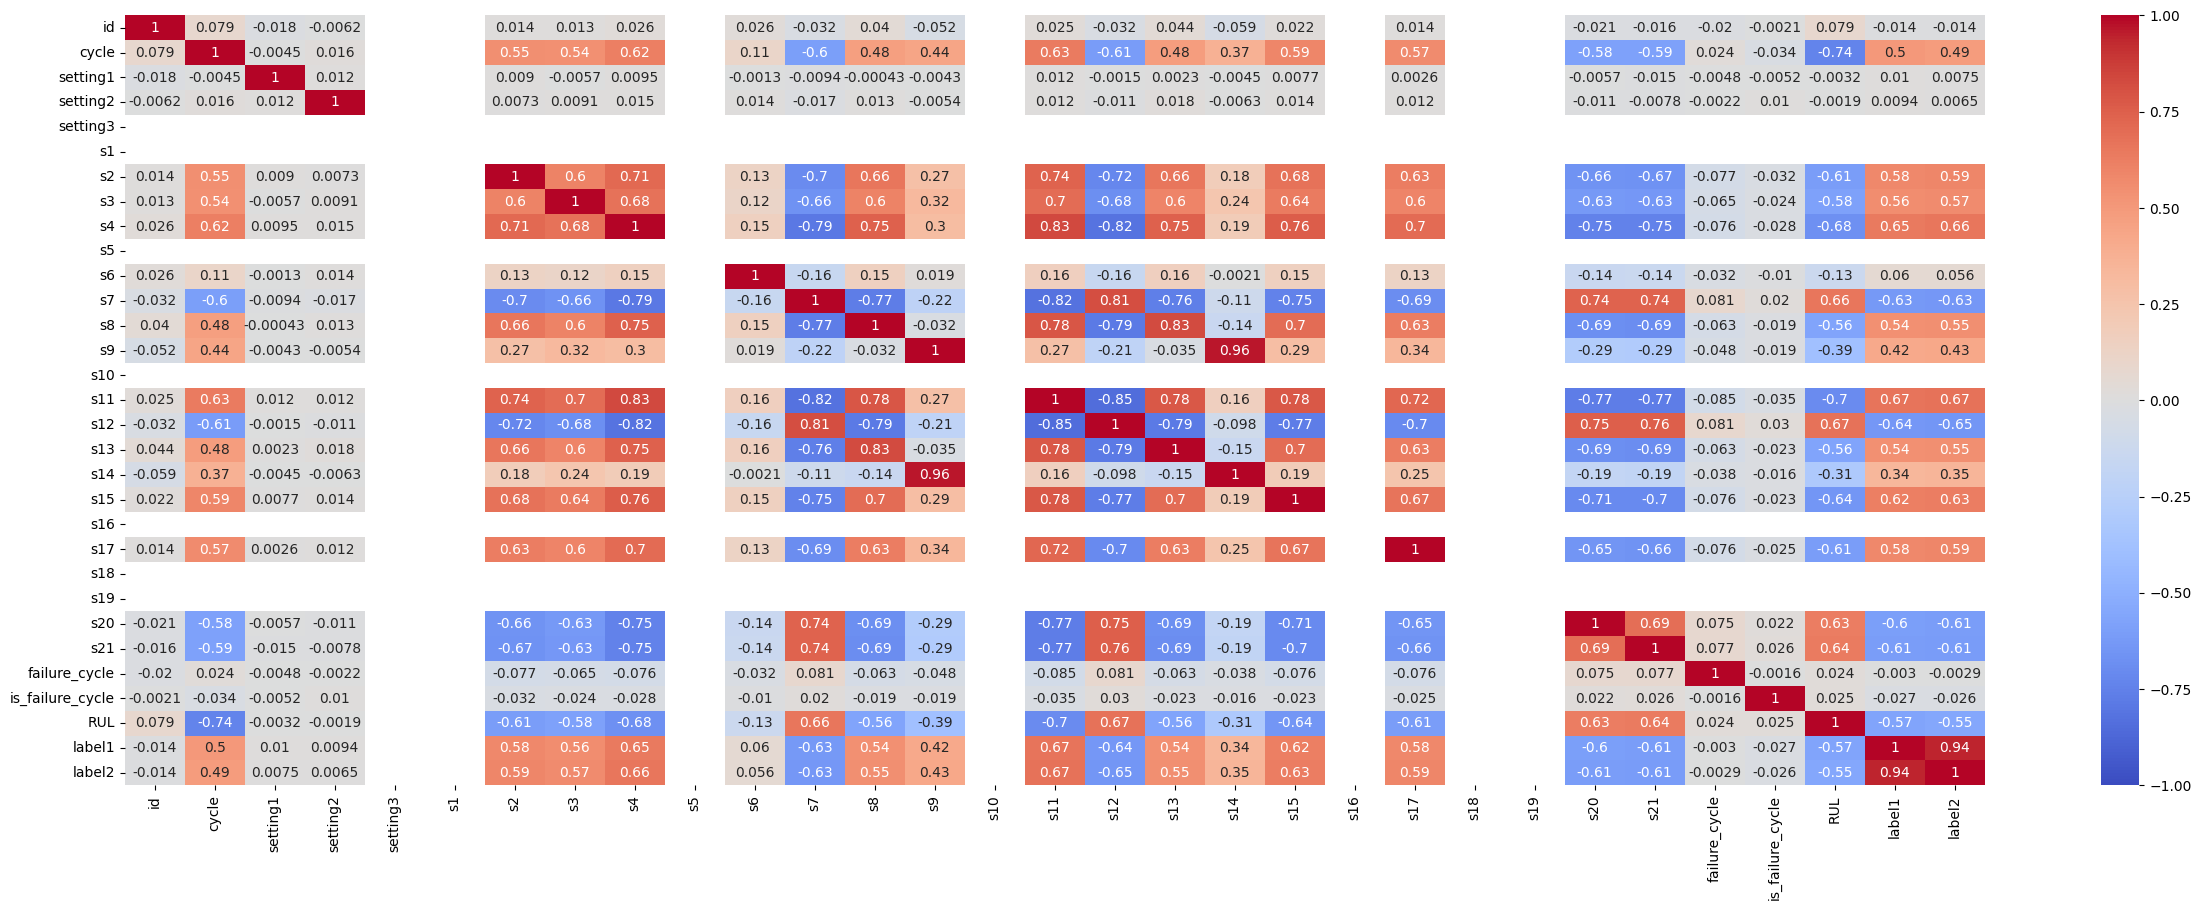

In [4]:
plt.figure(figsize=[30,10])
sns.heatmap (df.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1);

In [5]:
cols_a_borrar = ['setting1', 'setting2', 'setting3', 's1','s5','s6', 's9','s10','s16','s14', 's18', 's19', 'failure_cycle','is_failure_cycle','label1','label2']
df_red = df.drop(columns=cols_a_borrar)
df_red

id  cycle        s2        s3        s4        s7        s8       s11  \
0        1      1  0.183735  0.406802  0.309757  0.726248  0.242424  0.369048   
1        1      2  0.283133  0.453019  0.352633  0.628019  0.212121  0.380952   
2        1      3  0.343373  0.369523  0.370527  0.710145  0.272727  0.250000   
3        1      4  0.343373  0.256159  0.331195  0.740741  0.318182  0.166667   
4        1      5  0.349398  0.257467  0.404625  0.668277  0.242424  0.255952   
...    ...    ...       ...       ...       ...       ...       ...       ...   
20626  100    196  0.686747  0.587312  0.782917  0.254428  0.439394  0.726190   
20627  100    197  0.701807  0.729453  0.866475  0.162641  0.500000  0.708333   
20628  100    198  0.665663  0.684979  0.775321  0.175523  0.515152  0.738095   
20629  100    199  0.608434  0.746021  0.747468  0.133655  0.530303  0.916667   
20630  100    200  0.795181  0.639634  0.842167  0.151369  0.545455  0.803571   

            s12       s13       s15       s17       s20       s21    RUL  
0      0.633262  0.205882  0.363986  0.333333  0.713178  0.724662  191.0  
1      0.765458  0.279412  0.411312  0.333333  0.666667  0.731014  190.0  
2      0.795309  0.220588  0.357445  0.166667  0.627907  0.621375  189.0  
3      0.889126  0.294118  0.166603  0.333333  0.573643  0.662386  188.0  
4      0.746269  0.235294  0.402078  0.416667  0.589147  0.704502  187.0  
...         ...       ...       ...       ...       ...       ...    ...  
20626  0.170576  0.558824  0.656791  0.750000  0.271318  0.109500    4.0  
20627  0.211087  0.500000  0.727203  0.583333  0.124031  0.366197    3.0  
20628  0.281450  0.529412  0.922278  0.833333  0.232558  0.053991    2.0  
20629  0.208955  0.514706  0.823394  0.583333  0.116279  0.234466    1.0  
20630  0.130064  0.558824  0.687572  0.666667  0.178295  0.218172    0.0  

[20631 rows x 15 columns]

In [6]:
df_red.describe()

id         cycle            s2            s3            s4  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean      51.506568    108.807862      0.443052      0.424746      0.450435   
std       29.227633     68.880990      0.150618      0.133664      0.151935   
min        1.000000      1.000000      0.000000      0.000000      0.000000   
25%       26.000000     52.000000      0.335843      0.331807      0.339467   
50%       52.000000    104.000000      0.430723      0.415522      0.435348   
75%       77.000000    156.000000      0.539157      0.508829      0.545324   
max      100.000000    362.000000      1.000000      1.000000      1.000000   

                 s7            s8           s11           s12           s13  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean       0.566459      0.297957      0.411410      0.580697      0.317871   
std        0.142527      0.107554      0.158981      0.157261      0.105763   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.476651      0.227273      0.297619      0.484009      0.235294   
50%        0.578100      0.287879      0.392857      0.594883      0.308824   
75%        0.669887      0.363636      0.505952      0.695096      0.382353   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                s15           s17           s20           s21           RUL  
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000  
mean       0.451118      0.434221      0.524241      0.546127    107.807862  
std        0.144306      0.129064      0.140114      0.149476     68.880990  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.346287      0.333333      0.434109      0.452361     51.000000  
50%        0.438630      0.416667      0.534884      0.557443    103.000000  
75%        0.541362      0.500000      0.627907      0.652582    155.000000  
max        1.000000      1.000000      1.000000      1.000000    361.000000

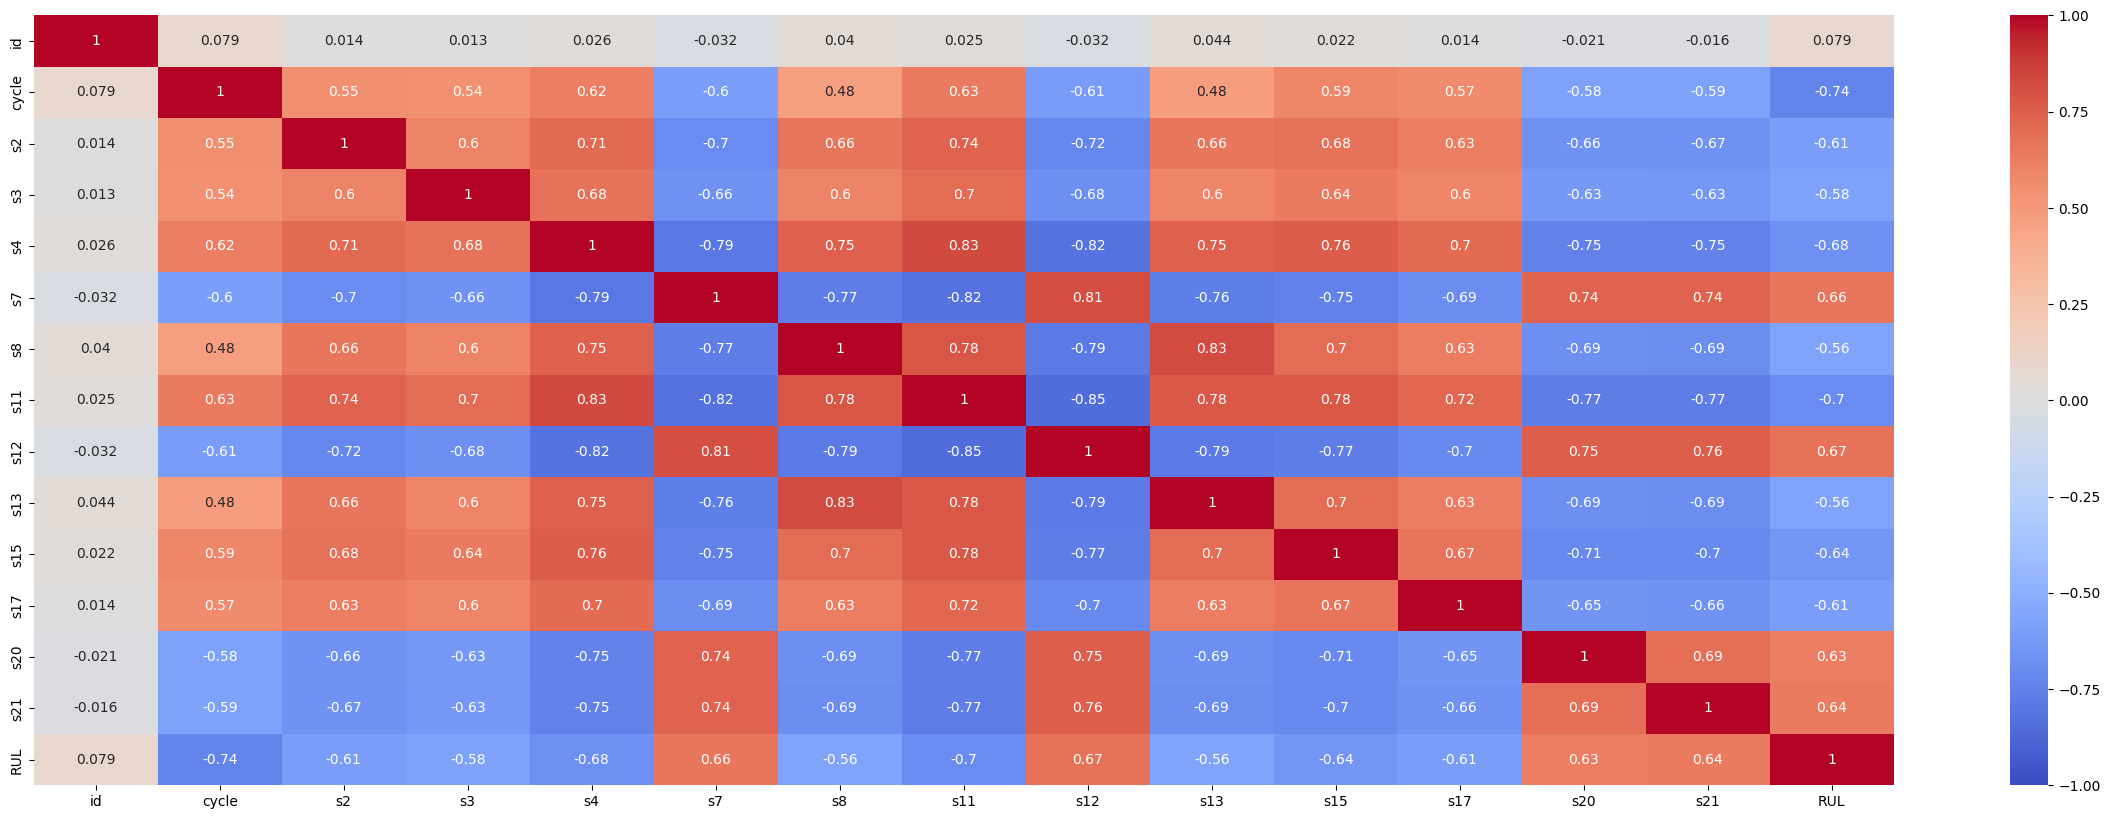

In [7]:
plt.figure(figsize=[30,10])
sns.heatmap (df_red.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1);

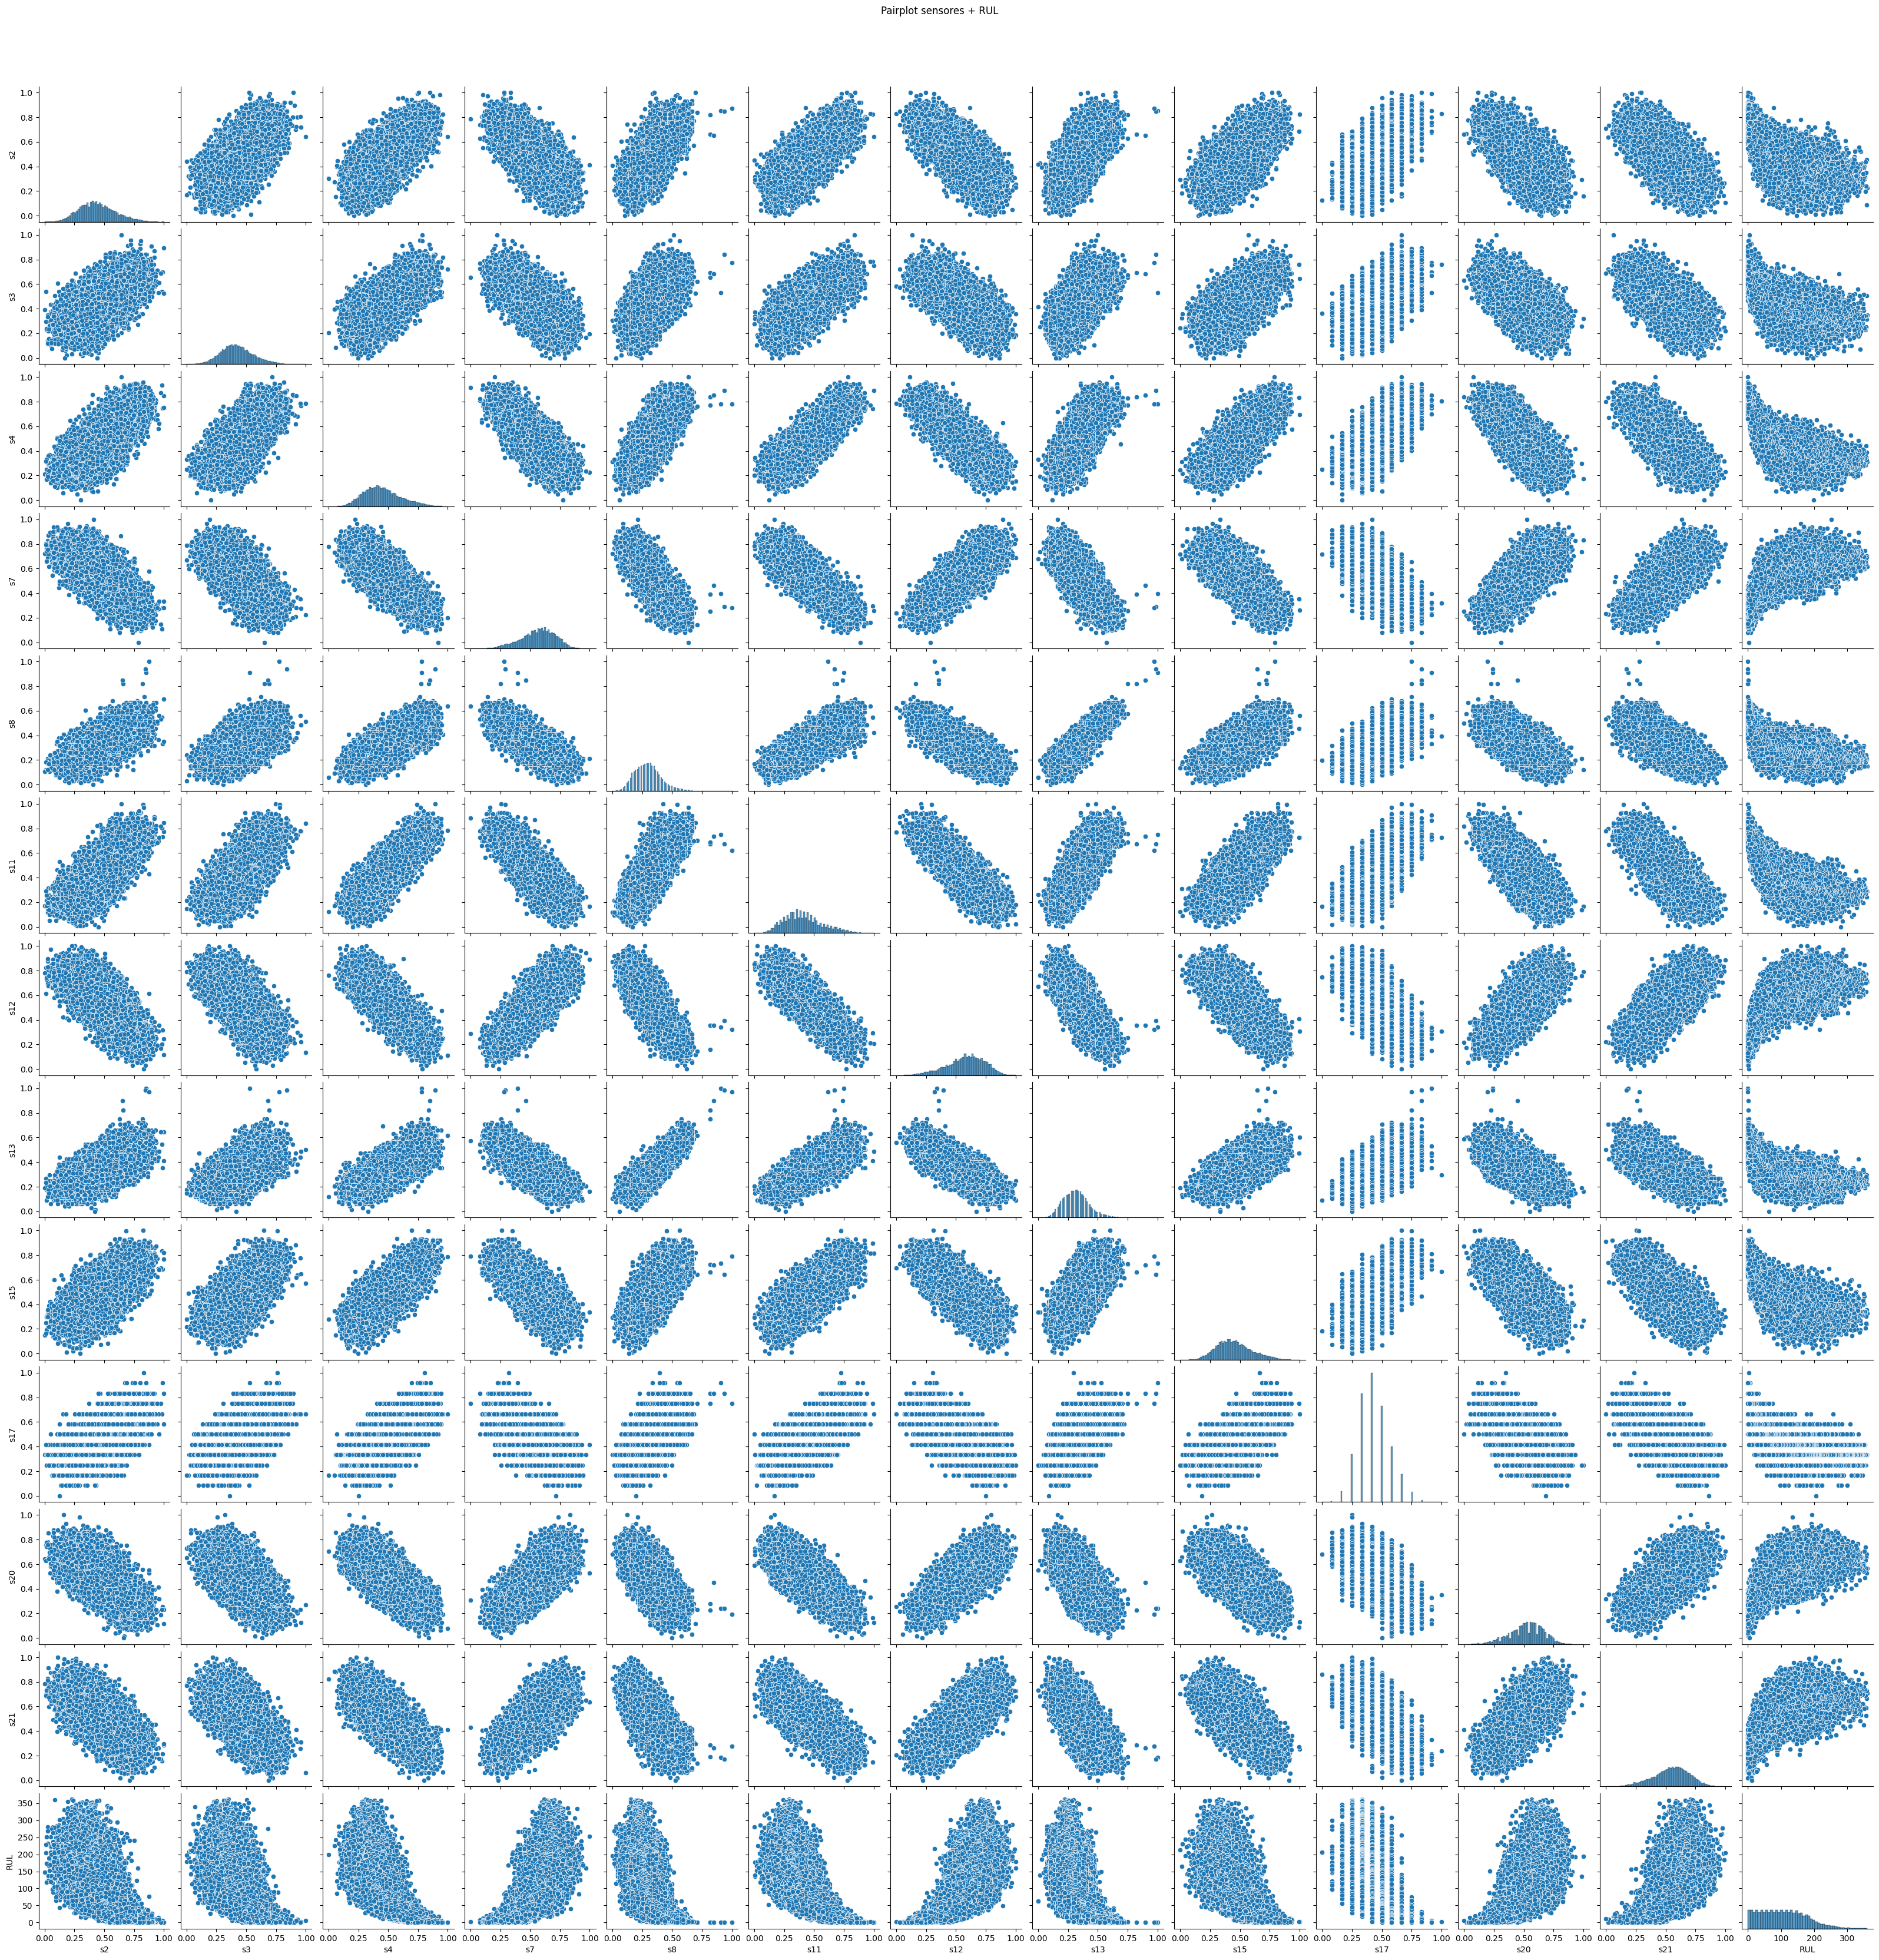

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['s2','s3','s4','s7','s8','s11','s12','s13','s15','s17','s20','s21','RUL']
df_numeric = df[numeric_cols]

# Crear el pairplot
sns.pairplot(
    df_numeric,
    kind='scatter',        # gráficos de dispersión fuera de la diagonal
    diag_kind='hist',      # histogramas en la diagonal
   )
plt.suptitle("Pairplot sensores + RUL", y=1.03)
plt.show()


La ultima variable es RUL

## LINEAR REGRESSION

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Asumiendo df es tu DataFrame original
X = df_red.drop(columns=['id', 'cycle', 'RUL'])
y = df_red['RUL']

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Escalar los features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


(16504, 12)
(4127, 12)
(16504,)
(4127,)


In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2 Score: {r2:.3f}")


MSE: 2098.57
MAE: 35.12
R^2 Score: 0.561


Mean Squared Error (MSE): Un error cuadrático medio de ~1996 implica que el error promedio al cuadrado entre las predicciones y el valor real es bastante alto.

Mean Absolute Error (MAE): Un error medio absoluto de ~34 significa que, en promedio, tus predicciones se desvían en ±34 ciclos de RUL.

R² = 0.582 indica que tu modelo lineal explica ~58% de la variabilidad del RUL, lo cual es razonable para un modelo tan simple.

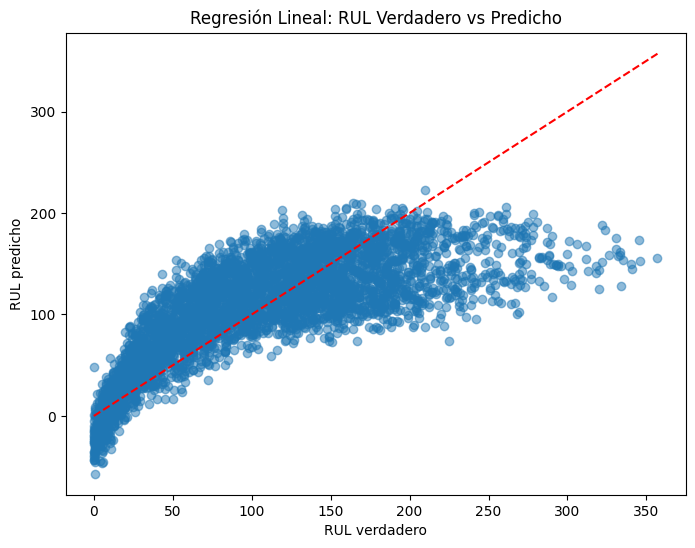

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("RUL verdadero")
plt.ylabel("RUL predicho")
plt.title("Regresión Lineal: RUL Verdadero vs Predicho")
plt.show()


## REGRESION POLINOMICA

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Carga tu DataFrame
X = df_red.drop(columns=['id', 'cycle', 'RUL'])
y = df_red['RUL']

# Divide en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Escala los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
# Define grado del polinomio
degree = 3
poly = PolynomialFeatures(degree=degree, include_bias=False)

# Transforma las características
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("Nuevas dimensiones:", X_train_poly.shape)


Nuevas dimensiones: (16504, 454)


In [25]:
from sklearn.linear_model import LinearRegression

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

LinearRegression()

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model_poly.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.3f}")


MSE: 2105.32
MAE: 34.37
R²: 0.559


Esto indica que tu modelo explica alrededor del 51 % de la variabilidad del RUL, lo cual está por debajo del rendimiento inicial de la regresión lineal (R² ~ 0.56), lo que es típico cuando se introduce mayor complejidad sin regularización ni validación adecuada.

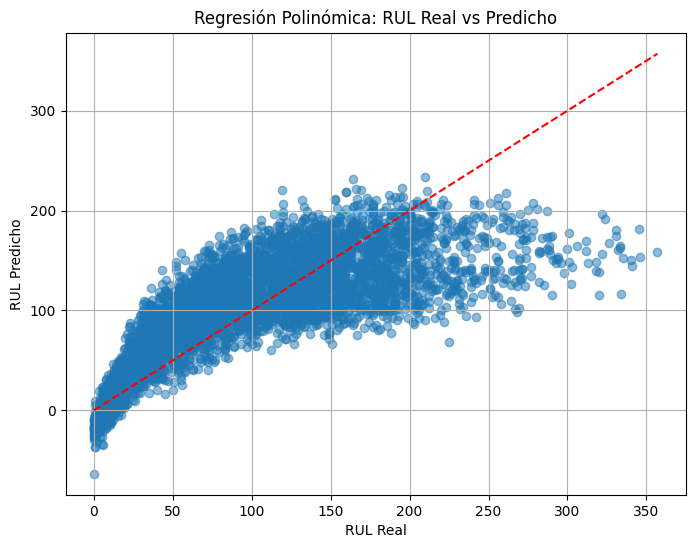

In [23]:


plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')


plt.xlabel('RUL Real')
plt.ylabel('RUL Predicho')
plt.title('Regresión Polinómica: RUL Real vs Predicho')
plt.grid(True)
plt.show()

## DECISION TREE

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Definir variables predictoras y objetivo
X = df.drop(columns=['RUL'])
y = df['RUL']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
from sklearn.tree import DecisionTreeRegressor

# Inicializar el modelo
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Entrenar el modelo
dt_model.fit(X_train_scaled, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Realizar predicciones
y_pred = dt_model.predict(X_test_scaled)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)


print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²_test: {r2_test:.2f}')



MSE: 1279.61
MAE: 25.50
R²_test: 0.72


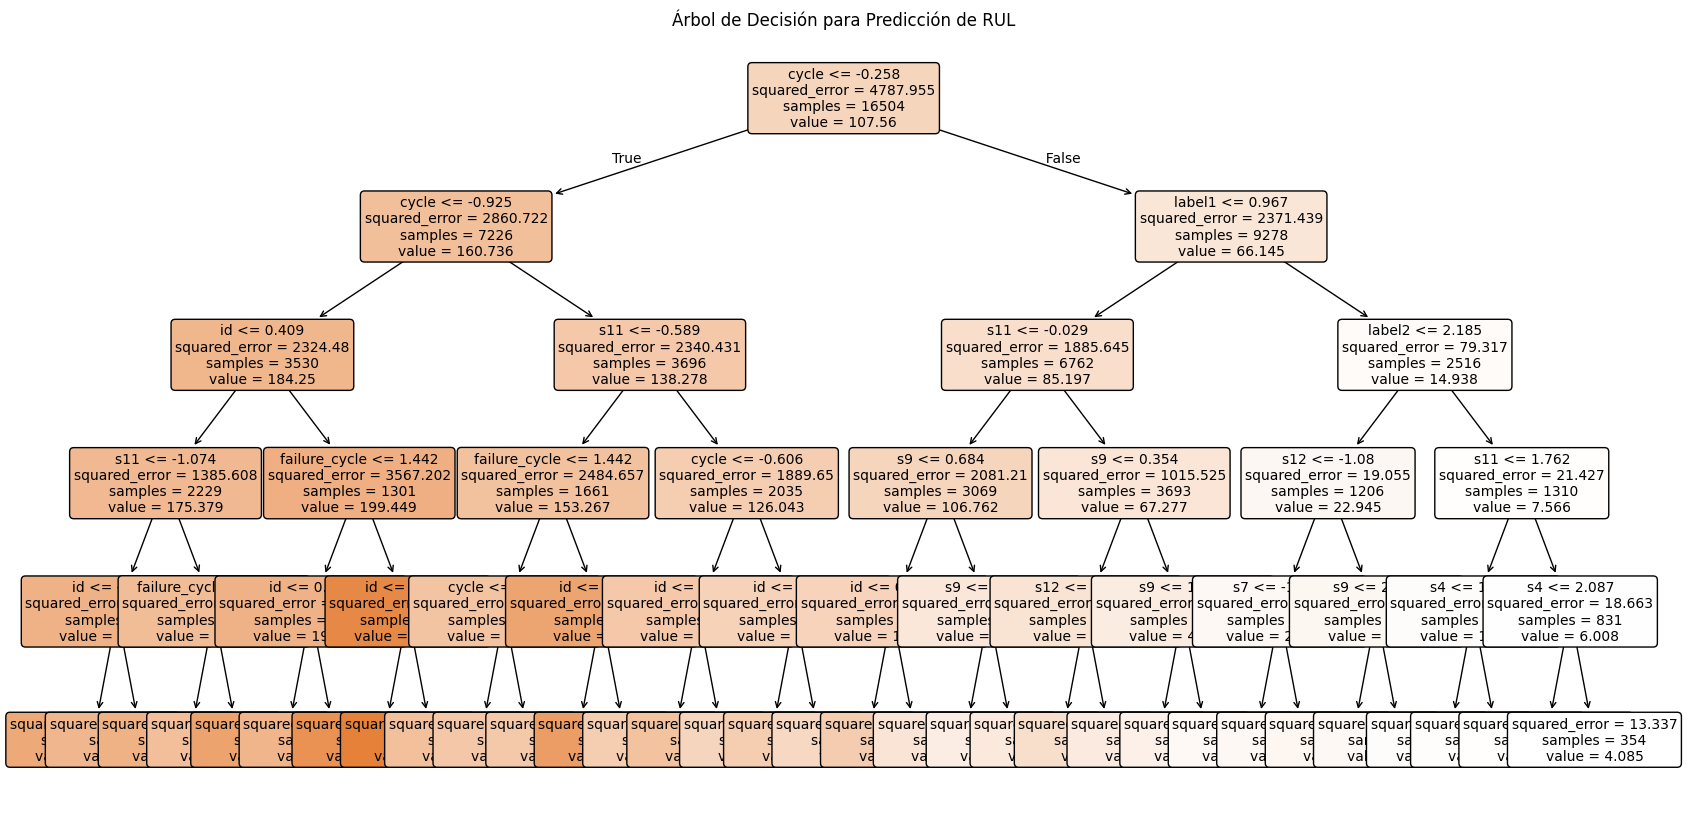

In [33]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Árbol de Decisión para Predicción de RUL")
plt.show()


## LASSO

In [37]:
# Definir variables predictoras y objetivo
X = df.drop(columns=['RUL'])
y = df['RUL']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
from sklearn.linear_model import Lasso

# Inicializar el modelo
lasso_model = Lasso(alpha=0.05081205417314886)

# Entrenar el modelo
lasso_model.fit(X_train_scaled, y_train)


Lasso(alpha=0.05081205417314886)

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Realizar predicciones
y_pred = lasso_model.predict(X_test_scaled)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.2f}')


MSE: 1526.56
MAE: 30.24
R²: 0.67


In [40]:
from sklearn.linear_model import LassoCV

# Inicializar el modelo con validación cruzada
lasso_cv = LassoCV(cv=5)

# Entrenar el modelo
lasso_cv.fit(X_train_scaled, y_train)

# Mejor valor de alpha
print(f'Mejor valor de alpha: {lasso_cv.alpha_}')


Mejor valor de alpha: 0.05081205417314886
